# Creating Visualizations to Explore Relationships

## Contents List:

#### 1. Import Visualization Libraries and Data
#### 2. Create a Correlation Heatmap
#### 3. Create Scatterplots
#### 4. Create a Pair Plot
#### 5. Create a Categorical Plot
#### 6. Questions
#### 7. Define hypotheses
#### 8. Export data

## 1. Import Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Ensure charts I create are displayed in the notebook without the need to "call" them specifically

%matplotlib inline

In [3]:
# Import merged_deaths_and_income.csv

path = r'C:\Users\susan\OneDrive\Desktop\Data Analytics Program\Causes_of_Death_Worldwide_Analysis_Susan_Lee'

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_deaths_and_income.csv'), index_col = False)

In [4]:
# Set the max columns and rows to none

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# Check top five rows

df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985,South Asia,Low income,both
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092,South Asia,Low income,both
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325,South Asia,Low income,both
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601,South Asia,Low income,both
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816,South Asia,Low income,both


In [6]:
# Check shape

df.shape

(6030, 37)

## 2. Create a correlation heatmap using seaborn:

In [7]:
# Add a numeric column for 'Income group' classifications

df.loc[df['Income group'] == 'Low income', 'Income code'] = '1'

In [8]:
df.loc[df['Income group'] == 'Lower middle income', 'Income code'] = '2'

In [9]:
df.loc[df['Income group'] == 'Upper middle income', 'Income code'] = '3'

In [10]:
df.loc[df['Income group'] == 'High income', 'Income code'] = '4'

In [11]:
df['Income code'].value_counts(dropna = False)

4    2010
3    1620
2    1620
1     780
Name: Income code, dtype: int64

In [12]:
# Check data types

df.dtypes

Country/Territory                             object
Code                                          object
Year                                           int64
Meningitis                                     int64
Alzheimer's Disease and Other Dementias        int64
Parkinson's Disease                            int64
Nutritional Deficiencies                       int64
Malaria                                        int64
Drowning                                       int64
Interpersonal Violence                         int64
Maternal Disorders                             int64
HIV/AIDS                                       int64
Drug Use Disorders                             int64
Tuberculosis                                   int64
Cardiovascular Diseases                        int64
Lower Respiratory Infections                   int64
Neonatal Disorders                             int64
Alcohol Use Disorders                          int64
Self-harm                                     

In [13]:
# Change the data type of 'Income code' from object to int64

df['Income code'] = df['Income code'].astype('int64')

In [14]:
# Recheck data types

df.dtypes

Country/Territory                             object
Code                                          object
Year                                           int64
Meningitis                                     int64
Alzheimer's Disease and Other Dementias        int64
Parkinson's Disease                            int64
Nutritional Deficiencies                       int64
Malaria                                        int64
Drowning                                       int64
Interpersonal Violence                         int64
Maternal Disorders                             int64
HIV/AIDS                                       int64
Drug Use Disorders                             int64
Tuberculosis                                   int64
Cardiovascular Diseases                        int64
Lower Respiratory Infections                   int64
Neonatal Disorders                             int64
Alcohol Use Disorders                          int64
Self-harm                                     

In [15]:
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'Region',
       'Income group', '_merge', 'Income code'],
      dtype='object')

In [16]:
# Create a subset excluding the 'Year' column

sub = df[['Meningitis',
       "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'Income code']]

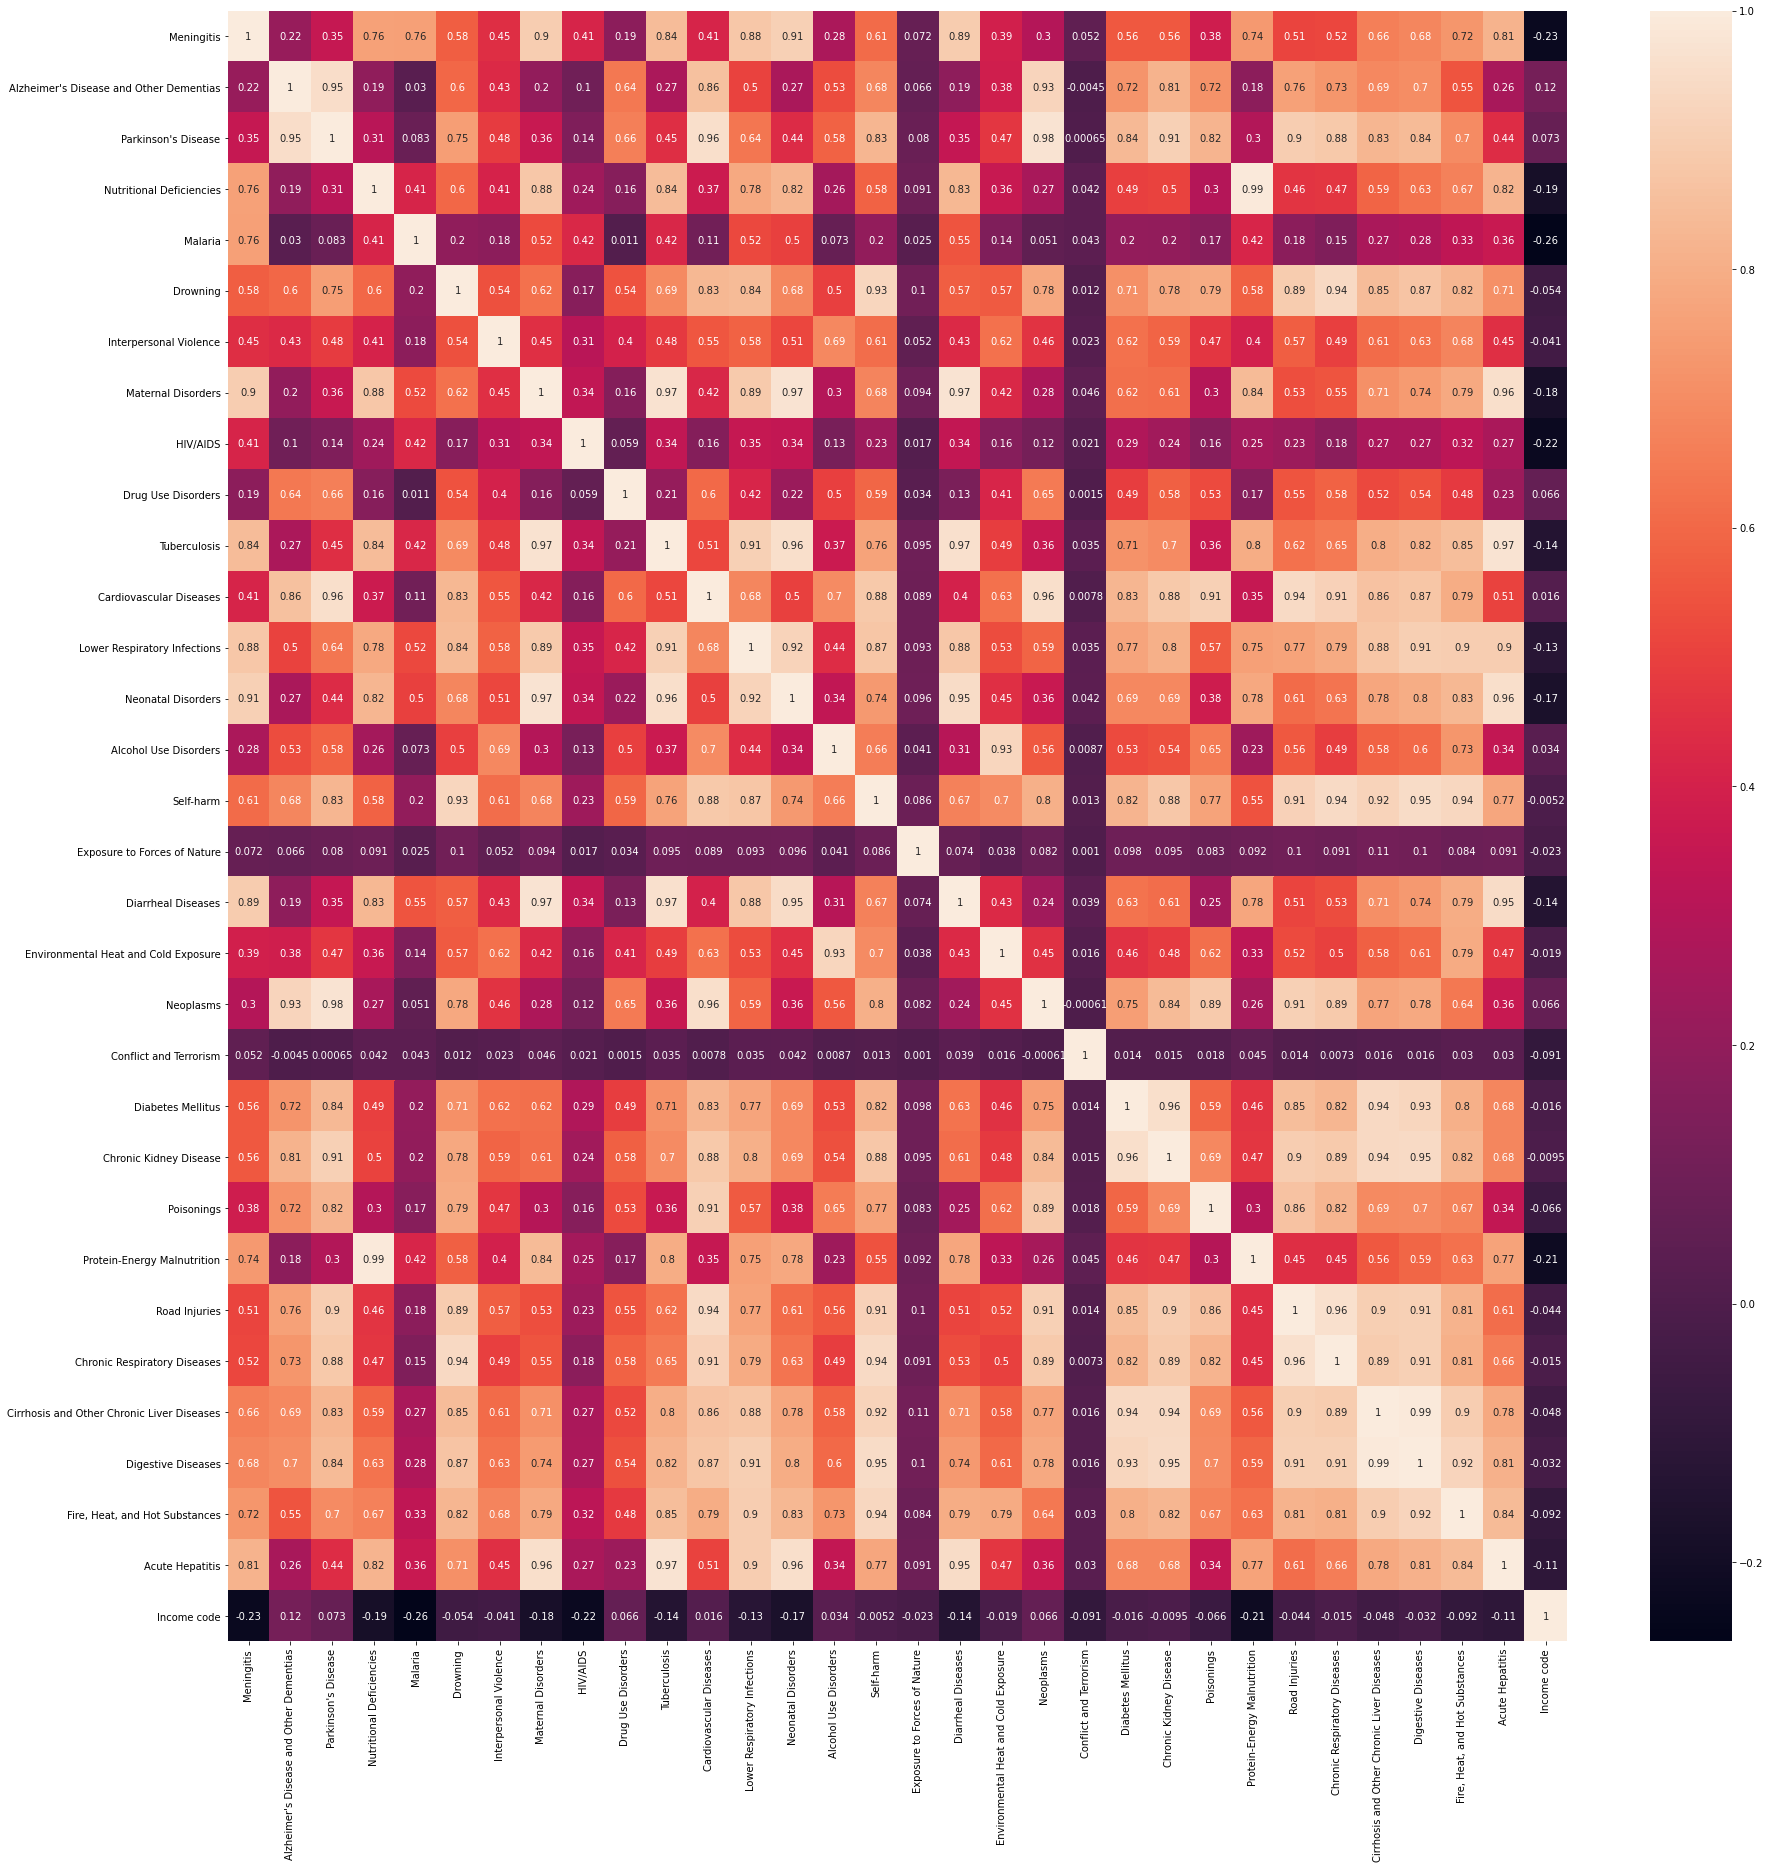

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(30,30))

# Create the correlation heatmap
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

### High coefficients mean there is a strong positive correlation between 2 variables. For example, 'Nutritional Deficiencies' and 'Protein-Energy Malnutrition' have a very strong positive correlation of 0.99. That means the higher the DALYs (Disability Adjusted Life Years) for 'Nutritional Deficiencies', the higher the DALYs for 'Protein-Energy Malnutrition'. This relationship exists for multiple pairs from the heatmap.

### On the other hand, a negative coefficient means there is a negative correlation between 2 variables. For example, 'Malaria' and 'Income code' have a weak negative correlation of -0.26. This means the higher the DALYs for 'Malaria', the lower the income of that country.

In [18]:
# Export correlation heatmap

corr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_heatmap.png'))

## 3. Create scatterplots

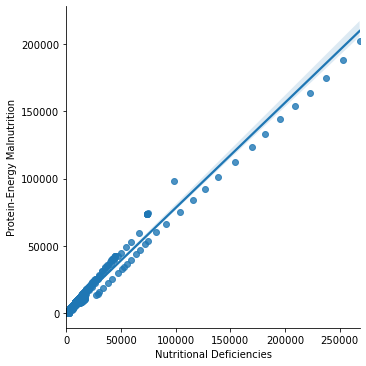

In [19]:
# Create a scatterplot for the 'Nutritional Deficiencies' and 'Protein-Energy Malnutrition' columns in seaborn

scatter_1 = sns.lmplot(x = 'Nutritional Deficiencies', y = 'Protein-Energy Malnutrition', data = df)

### There is a strong positive linear relationship between 'Nutritional Deficiencies' and 'Protein-Energy Malnutrition'. This means a country/territory with a high rate of 'Nutritional Deficiencies' will very likely also have a high rate of 'Protein-Energy Malnutrition'.

In [20]:
scatter_1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_nutrit_defic_protein_malnut.png'))

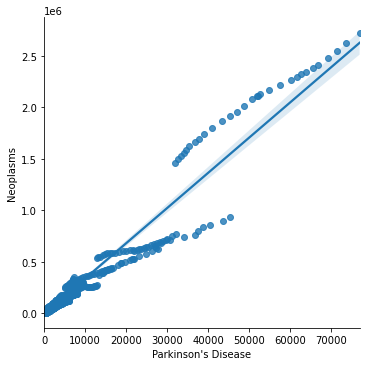

In [21]:
# Create a scatterplot for the "Parkinson's Disease" and 'Neoplasms' columns in seaborn

scatter_2 = sns.lmplot(x = "Parkinson's Disease", y = 'Neoplasms', data = df)

### There is a positive linear relationship between "Parkinson's Disease" and 'Neoplasms', but the data points do deviate from the line of best fit around the center of the graph.

In [22]:
scatter_2.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_parkinson_neoplasms.png'))

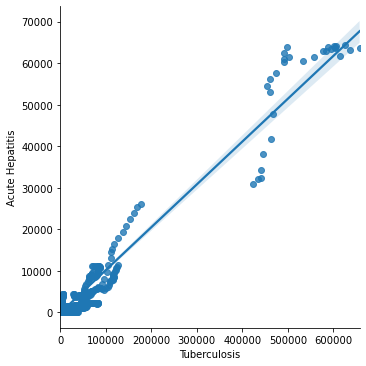

In [23]:
# Create a scatterplot for the 'Tuberculosis' and 'Acute Hepatitis' columns in seaborn

scatter_3 = sns.lmplot(x = 'Tuberculosis', y = 'Acute Hepatitis', data = df)

### There is a positive linear relationship between 'Tuberculosis' and 'Acute Hepatitis', but there's a gap in the data points between 200,000 to 400,000 for 'Tuberculosis'.

In [24]:
scatter_3.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_tb_hepatitis.png'))

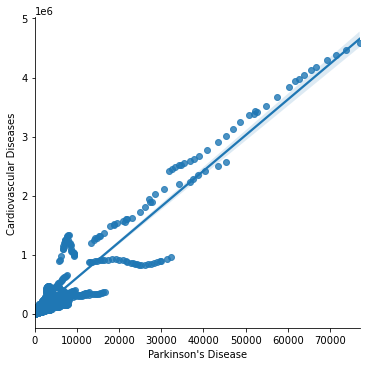

In [25]:
# Create a scatterplot for the "Parkinson's Disease" and 'Cardiovascular Diseases' columns in seaborn

scatter_4 = sns.lmplot(x = "Parkinson's Disease", y = 'Cardiovascular Diseases', data = df)

### There is a strong positive linear relationship between "Parkinson's Disease" and 'Cardiovascular Diseases', with minimal deviation from the line of best fit.

In [26]:
scatter_4.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_parkinsons_cardiovas.png'))

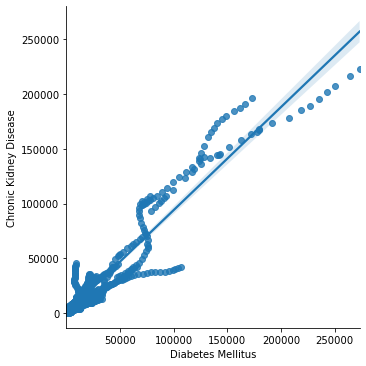

In [27]:
# Create a scatterplot for the 'Diabetes Mellitus' and 'Chronic Kidney Disease' columns in seaborn

scatter_5 = sns.lmplot(x = 'Diabetes Mellitus', y = 'Chronic Kidney Disease', data = df)

### There is a strong positive linear relationship between 'Diabetes Mellitus' and 'Chronic Kidney Disease', with minimal deviation from the line of best fit.

In [28]:
scatter_5.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_diabetes_kidney.png'))

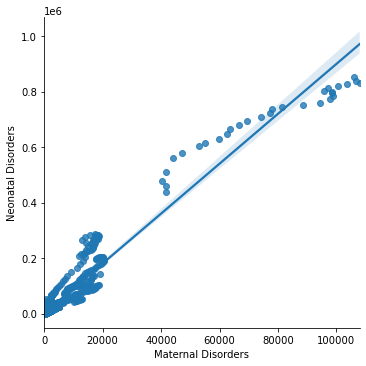

In [29]:
# Create a scatterplot for the 'Maternal Disorders' and 'Neonatal Disorders' columns in seaborn

scatter_6 = sns.lmplot(x = 'Maternal Disorders', y = 'Neonatal Disorders', data = df)

### There is a positive linear relationship between 'Maternal Disorders' and 'Neonatal Disorders', with minimal deviation from the line of best fit.

In [30]:
scatter_6.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_maternal_neonatal.png'))

## 4. Create a pair plot:

In [31]:
# Create a subset

sub_2 = df[["Parkinson's Disease", 'Nutritional Deficiencies',
       'Maternal Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Neonatal Disorders', 'Neoplasms', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Protein-Energy Malnutrition',
       'Acute Hepatitis', 'Income code']]

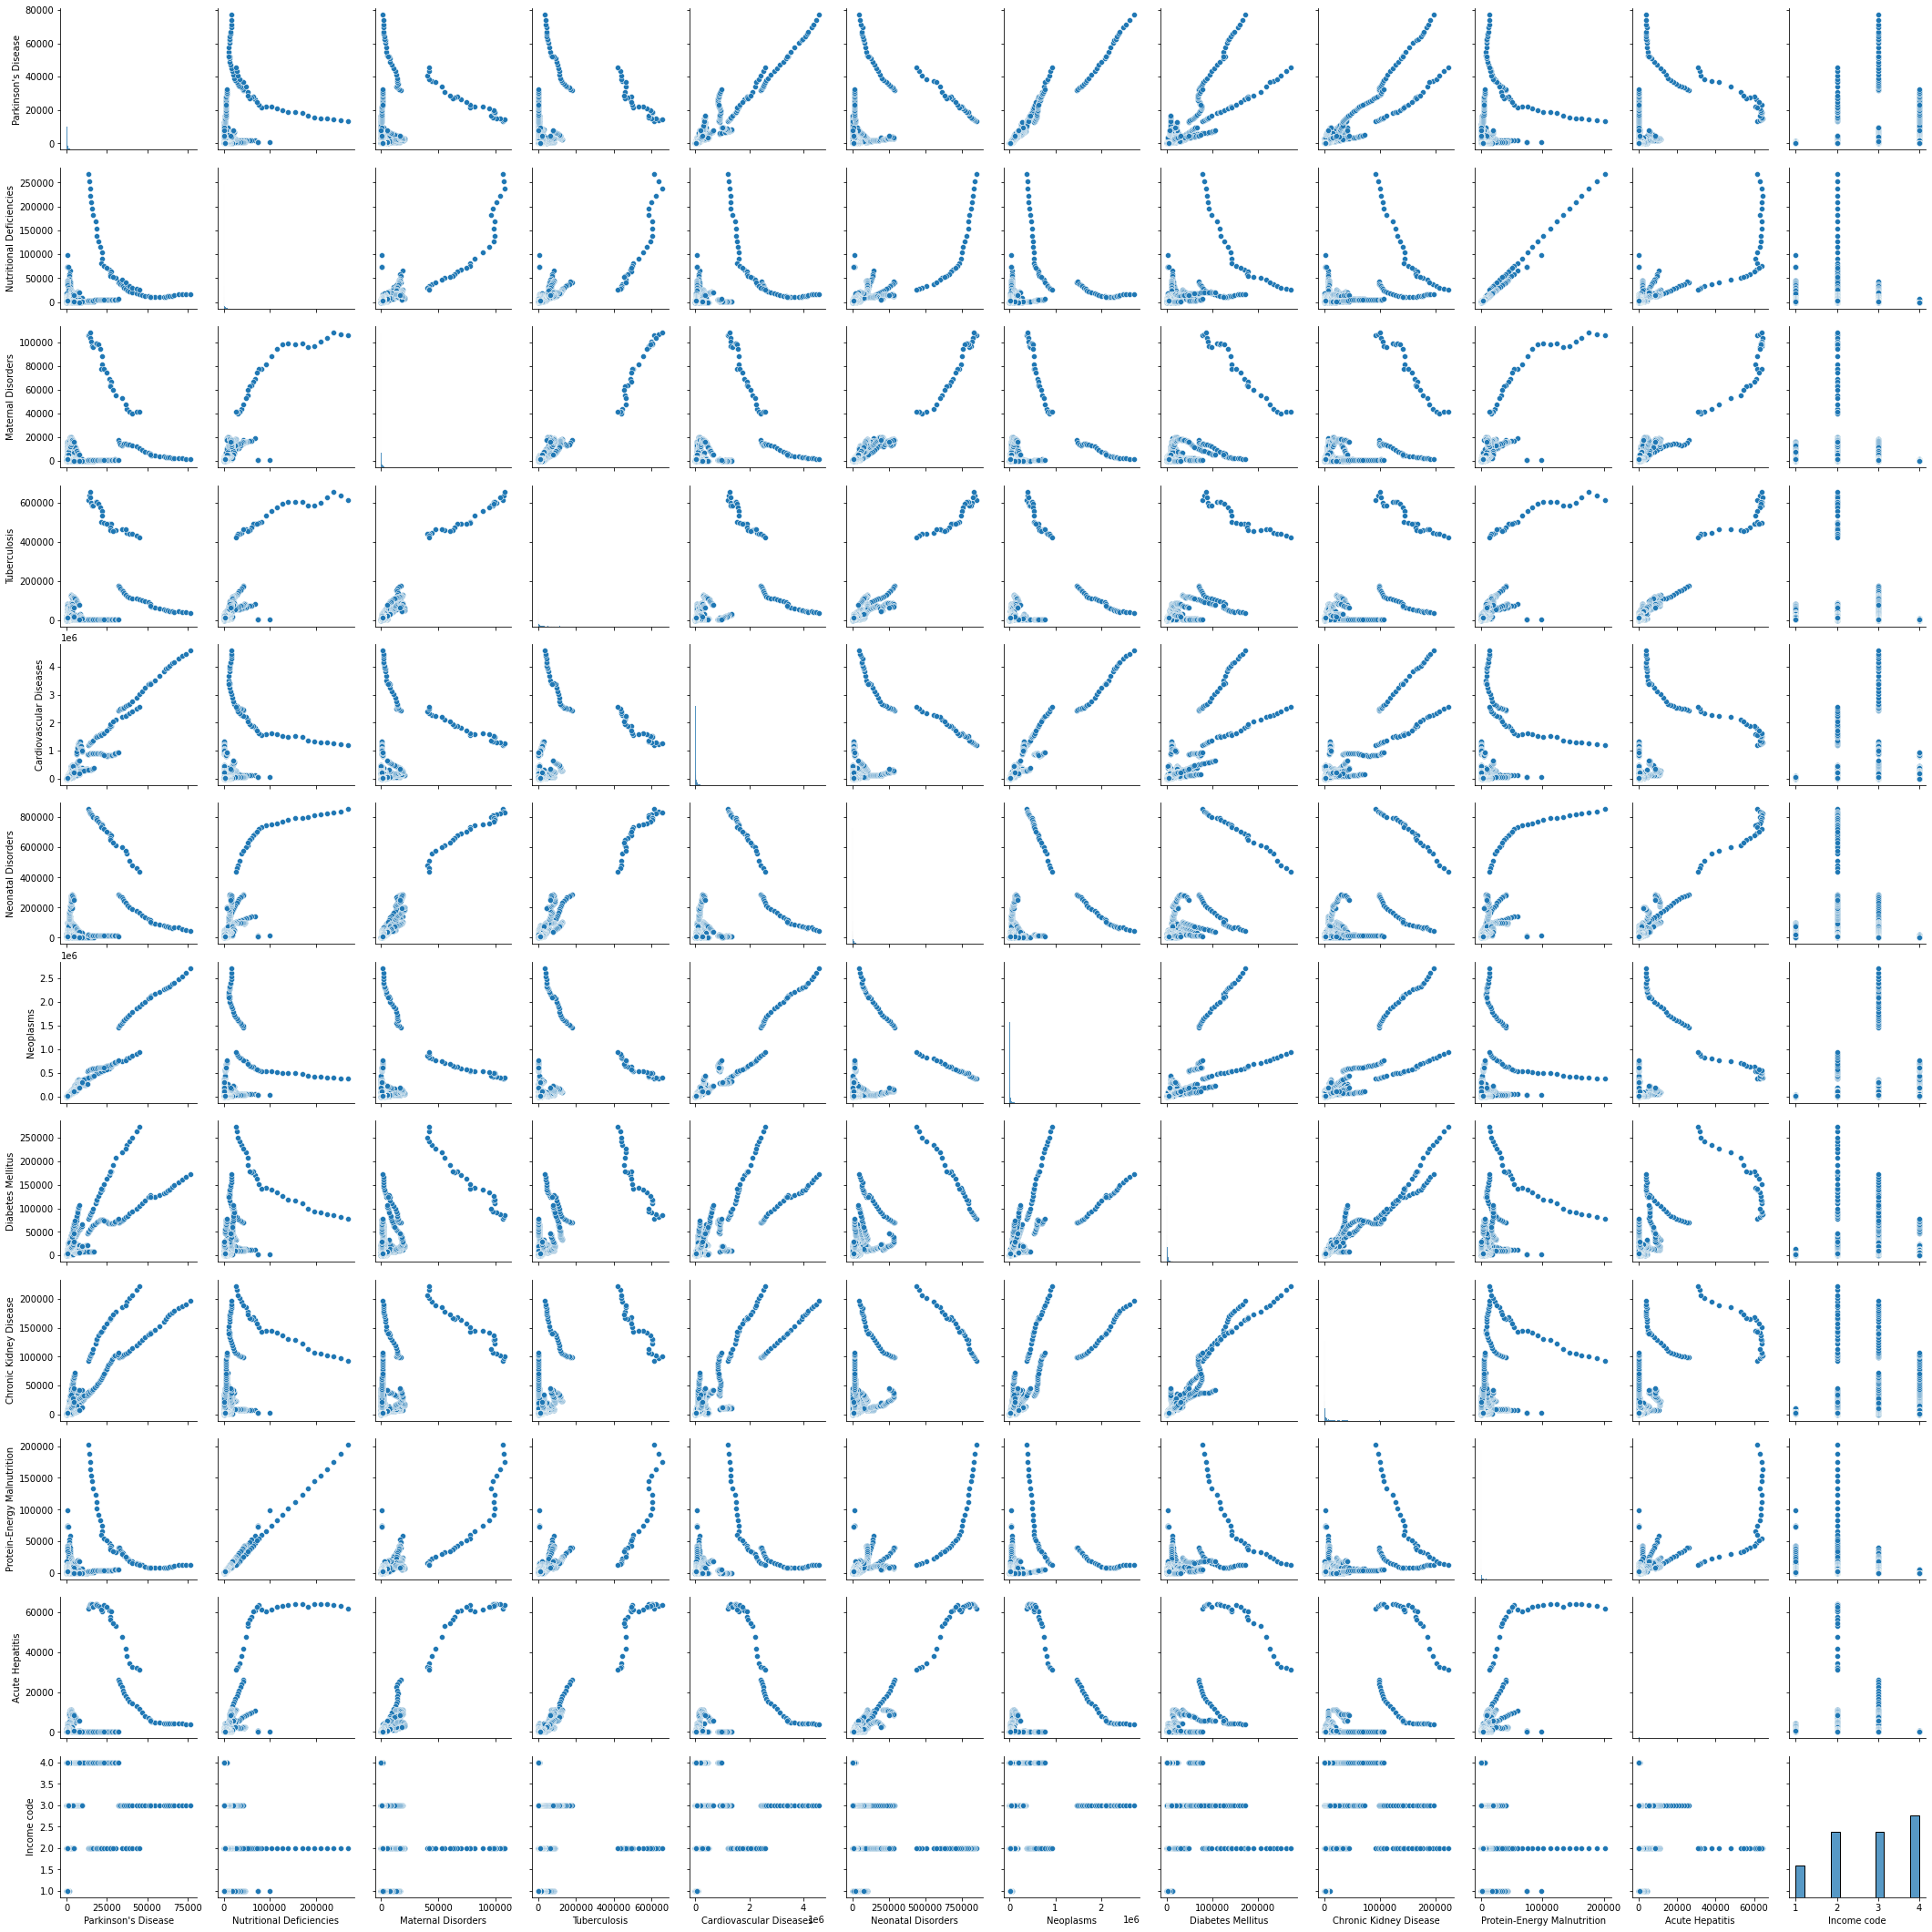

In [32]:
# Create a pair plot 

pair_plot = sns.pairplot(sub_2)

### The pair plot shows many scatterplots with a positive linear relationship, such as 'Tuberculosis' and 'Maternal Disorders'. It also shows scatterplots with a negative linear relationship, such as "Neonatal Disorders' and 'Neoplasms'. There also seems to be a pattern between the scatterplots of 'Income code' and various causes of death, suggesting that the wealth of a country/territory may have an impact on its causes of death.

In [33]:
pair_plot.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pair_plot.png'))

## 5. Create a categorical plot

In [34]:
# Import averages_for_nutritional_defic_and_protein_malnutrition.xlsx

df_avg = pd.read_excel(os.path.join(path, '02 Data', 'Original Data', 'averages_for_nutritional_defic_and_protein_malnutrition.xlsx'), index_col = False)

In [35]:
# Check top 5 rows

df_avg.head()

,Country/Territory,Code,Average of Nutritional Deficiencies,Average of Protein-Energy Malnutrition,Income group
0,Afghanistan,AFG,2381.766667,2338.766667,Low income
1,Albania,ALB,18.966667,17.533333,Upper middle income
2,Algeria,DZA,237.933333,213.566667,Lower middle income
3,American Samoa,ASM,2.000000,2.000000,High income
4,Andorra,AND,0.000000,0.000000,High income


In [36]:
# Check shape

df_avg.shape

(201, 5)

In [37]:
df_avg.dtypes

Country/Territory                          object
Code                                       object
Average of Nutritional Deficiencies       float64
Average of Protein-Energy Malnutrition    float64
Income group                               object
dtype: object

AttributeError: 'FacetGrid' object has no attribute 'set_xlim'

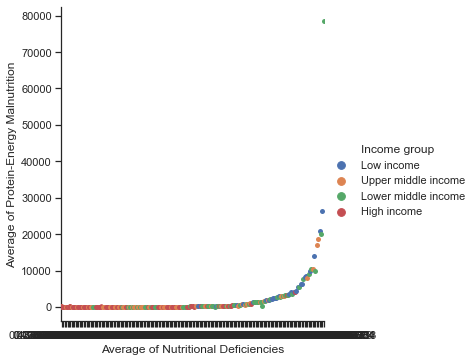

In [38]:
# Create a categorical plot using df_avg

sns.set(style = 'ticks')

cat_plot = sns.catplot(x = 'Average of Nutritional Deficiencies', y = 'Average of Protein-Energy Malnutrition', hue = 'Income group', data = df_avg)

cat_plot.set_xlim(0,110000, auto = True)

In [ ]:
type(cat_plot)

### The categorical plot shows that high income and upper middle income countries/territories have low DALYs for nutritional deficiencies and protein-energy malnutrition, while low income and lower middle income countries/territories have higher DALYs for those causes of death.

## 6. Questions:

### Revisiting initial questions:

### 1. What differences exist between countries? Can it be explained by the population size, wealth, or another factor?
#### - Income has an effect on how prevalent certain causes of death are between countries/territories.
### 2. What are some trends globally or within countries?
#### - There are certain causes of death that have a strong positive correlation with each other, such as Diabetes Mellitus and Chronic Kidney Disease.

### New questions to explore:

### 1. What causes the strong positive correlations between certain causes of death? Is it related to biology or another factor such as wealth?

### 2. What causes the repetitive pattern between the scatterplots of 'Income code' and various causes of death?

## 7. Define hypotheses

### 1. If a country/territory has an income group of 'Low income' or 'Low middle income', certain causes of death will be higher than for a country/territory with an income group of 'Upper middle income' and 'High income'.

### 2. If certain causes of death have a strong positive correlation, then there is either a common income level or a biological reason.

## 8. Export data

In [ ]:
# Check shape

df.shape

In [ ]:
# Export data

df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'merged_with_income_code.csv'), index = False)